In [5]:
# Generate a Sentiment Analysis file for the Streamlit app
import pandas as pd
import numpy as np
import json

# local library
from preproc import *

In [10]:
with open('speeches.json',encoding='utf-8') as f:
    speeches = json.load(f)
bow = create_bow(speeches)
speech = bow.reset_index()

In [14]:
salex_csv = 'StreamlitApp/salex_nrc.csv'
nrc_cols = "nrc_negative nrc_positive nrc_anger nrc_anticipation nrc_disgust nrc_fear nrc_joy nrc_sadness nrc_surprise nrc_trust".split()
emo = 'polarity'

salex = pd.read_csv(salex_csv).set_index('term_str')
salex.columns = [col.replace('nrc_','') for col in salex.columns]
salex['polarity'] = salex.positive - salex.negative

emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

TOKEN = tokenize(speech)
TOKEN = TOKEN.join(salex, on='term_str', how='left')
TOKEN[emo_cols] = TOKEN[emo_cols].fillna(0)

Sentiment = TOKEN.loc[speech['id']].copy()
Sentiment = Sentiment[emo_cols].mean().sort_values()

In [15]:
Sentiment.to_csv('StreamlitApp/sentiment.csv', index=True)

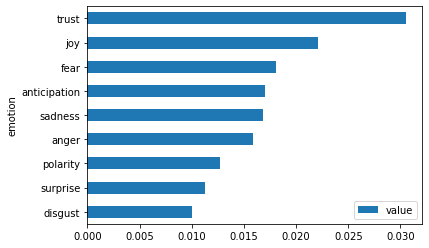

In [35]:
pd.read_csv('StreamlitApp/sentiment.csv')\
    .rename(columns={'Unnamed: 0': 'emotion', '0': 'value'})\
    .set_index('emotion').plot.barh()


In [36]:
speech['speaker'].unique()

array(['trump', 'biden', 'harris', 'pence'], dtype=object)

In [44]:
speech.loc[speech['speaker']=='biden',:].reset_index(drop=True).head(2)

,id,index,speaker,date,speech,title,transcript_type
0,Z6N1WdJgnLo,47,biden,2019-04-29T21:04:46Z,[Applause] [Music] my name [Applause] thank yo...,Joe Biden holds first 2020 campaign rally,speech
1,u-AEAq7jzcU,48,biden,2019-05-18T19:53:18Z,so let's do this please welcome my husband Joe...,Joe Biden speaks during a campaign rally in Ph...,speech
